# Part 1: make images

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
from datetime import datetime
import itertools
import numpy as np
from matplotlib.dates import DateFormatter
import copy
from tqdm import tqdm
import pickle as pkl
import os
import imageio
from PIL import ImageDraw,Image
import cv2
from collections import Counter

In [2]:
bbb = open("list_edges.pkl", "rb")
list_edges = pkl.load(bbb)

In [3]:
list_edges_successively_unique = []
last_edge_seen = {}
for k,edge in enumerate(list_edges):
    edge_ = {'start': edge['start'], 'end': edge['end'], 'action': edge['action'], 'command_line': edge['command_line'], 'pid': edge['pid']}
    if edge_ != last_edge_seen:
        edge_copy = copy.copy(edge)
        if type(edge['command_line']) == float:
            edge_copy['command_line'] = ""
        list_edges_successively_unique.append(edge_copy)
        last_edge_seen = edge_

In [4]:
bbb = open("pos_kamada_whole_graph.pkl", "rb")
pos = pkl.load(bbb)

pos_arr = np.array(list(pos.values()))
xmin, ymin = pos_arr.min(axis=0)
xmax, ymax = pos_arr.max(axis=0)
range_ = {
    'xmin':xmin,
    'xmax':xmax,
    'ymin':ymin,
    'ymax':ymax
}

100%|██████████| 39562/39562 [00:00<00:00, 236196.06it/s]

watched_pid_1 = 5452 in red
watched_pid_2 = 2952 in orange


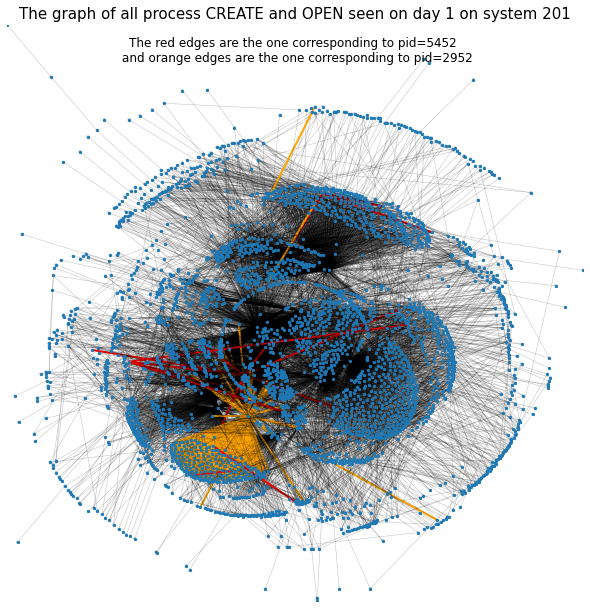

In [11]:
G_loc = nx.Graph()
list_filenames = []
ignore_terminate = True
iterable_loc_ = copy.copy(list_edges_successively_unique[:40000])
edge_pid = {}
node_size = 5
edge_size_attack = 2
factor_width = 4
alpha_attack = 1
factor_alpha = 4
watched_pid_1 = 5452
color_watched_pid_1 = 'red'
print("watched_pid_1 = "+str(watched_pid_1)+" in "+str(color_watched_pid_1))
watched_pid_2 = 2952
color_watched_pid_2 = 'orange'
print("watched_pid_2 = "+str(watched_pid_2)+" in "+str(color_watched_pid_2))
# # to take passed into account
# edges_pid_by_occurrences = {}

plt.figure(figsize=(8,8))
for t_ in tqdm(range(len(iterable_loc_))):
    edge = iterable_loc_[t_]
    edge_pid[str((edge['start'],edge['end']))] = edge['pid']
    # # to take passed into account
#     if str((edge['start'],edge['end'])) not in list(edges_pid_by_occurrences.keys()):
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))] = [edge['pid']]
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))] = [edge['pid']]
#     else:
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))].append(edge['pid'])
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))].append(edge['pid'])
    if ignore_terminate:
        G_loc.add_edge(
            u_of_edge=edge['start'],
            v_of_edge=edge['end']
        )
#         G_loc.add_edge(
#             u_for_edge=edge['start'],
#             v_for_edge=edge['end']
#         )
    else:
        if edge['action'] == 'TERMINATE':
            G_loc.remove_nodes_from([edge['end']])
        else:
            G_loc.add_edge(
                u_of_edge=edge['start'],
                v_of_edge=edge['end'],
                edge_attr_dict_factory={
                    'timestamp':edge['timestamp'],
                    'pid':edge['pid'],
                    'command_line':edge['command_line']
                }
            )

concerned_pid = [edge_pid[str((edge_loc_))] if str((edge_loc_)) in edge_pid.keys() else edge_pid[str((edge_loc_[1],edge_loc_[0]))] for edge_loc_ in G_loc.edges()]
concerned_colors = [color_watched_pid_1 if pid_ == watched_pid_1 else color_watched_pid_2 if pid_ == watched_pid_2 else 'black' for pid_ in concerned_pid]
concerned_width = [edge_size_attack if pid_ in [watched_pid_1,watched_pid_2] else edge_size_attack/factor_width for pid_ in concerned_pid]
concerned_alpha = [alpha_attack if pid_ in [watched_pid_1,watched_pid_2] else alpha_attack/factor_alpha for pid_ in concerned_pid]

# # to take passed into account
# concerned_list_pid = [edges_pid_by_occurrences[str((edge_loc_))] for edge_loc_ in G_loc.edges()]
# concerned_colors_temporal = [color_watched_pid_1 if watched_pid_1 in list_pid else color_watched_pid_2 if watched_pid_2 in list_pid else 'black' for list_pid in concerned_list_pid]
# concerned_width_temporal = [edge_size_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid) else edge_size_attack/factor_width for list_pid in concerned_list_pid]
# concerned_alpha_temporal = [alpha_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid)  else alpha_attack/factor_alpha for list_pid in concerned_list_pid]

nx.draw(
    G=G_loc,
    pos=pos,
    node_size=node_size,
    edge_color=concerned_colors,
    width=concerned_width,
    alpha=concerned_alpha
)

nx.draw(G=G_loc, pos=pos, node_size=node_size, width=0, alpha=1)

plt.xlim(range_['xmin'],range_['xmax'])
plt.ylim(range_['ymin'],range_['ymax'])
# plt.text(x=range_['xmax']-0.35,y=range_['ymax']-0.2,s='up to event = '+str(t_))
# plt.text(x=range_['xmax']-0.75,y=range_['ymax']-0.2,s='up to system time = '+str(edge['timestamp']))

# plt.close()
plt.title('The graph of all process CREATE and OPEN seen on day 1 on system 201',fontsize=15)
plt.suptitle(f'The {color_watched_pid_1} edges are the one corresponding to pid={watched_pid_1} \n and {color_watched_pid_2} edges are the one corresponding to pid={watched_pid_2}')
plt.savefig(f'plot_all_graph_highlighted_pid{watched_pid_1}_{watched_pid_2}_Terminate_{str(ignore_terminate)}.png')
plt.show()

 45%|████▍     | 17674/39562 [00:00<00:00, 176732.16it/s]

watched_pid_1 = 5452 in red
watched_pid_2 = 2952 in orange


100%|██████████| 39562/39562 [00:00<00:00, 185947.26it/s]


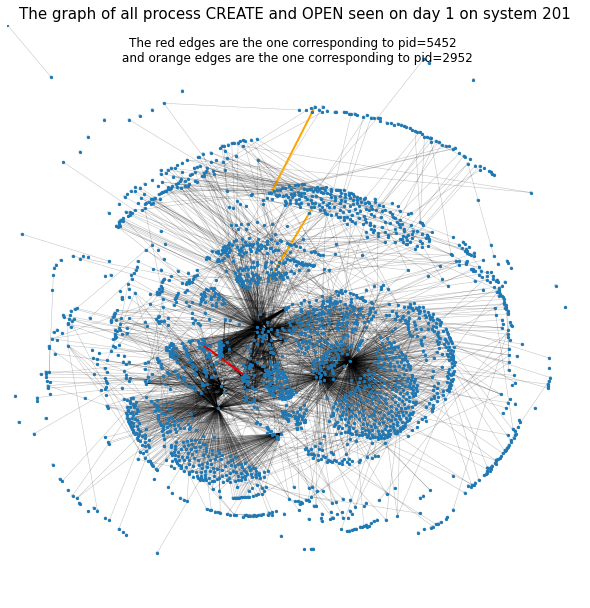

In [6]:
G_loc = nx.Graph()
list_filenames = []
ignore_terminate = False
iterable_loc_ = copy.copy(list_edges_successively_unique[:40000])
edge_pid = {}
node_size = 5
edge_size_attack = 2
factor_width = 4
alpha_attack = 1
factor_alpha = 4
watched_pid_1 = 5452
color_watched_pid_1 = 'red'
print("watched_pid_1 = "+str(watched_pid_1)+" in "+str(color_watched_pid_1))
watched_pid_2 = 2952
color_watched_pid_2 = 'orange'
print("watched_pid_2 = "+str(watched_pid_2)+" in "+str(color_watched_pid_2))
# # to take passed into account
# edges_pid_by_occurrences = {}

plt.figure(figsize=(8,8))
for t_ in tqdm(range(len(iterable_loc_))):
    edge = iterable_loc_[t_]
    edge_pid[str((edge['start'],edge['end']))] = edge['pid']
    # # to take passed into account
#     if str((edge['start'],edge['end'])) not in list(edges_pid_by_occurrences.keys()):
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))] = [edge['pid']]
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))] = [edge['pid']]
#     else:
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))].append(edge['pid'])
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))].append(edge['pid'])
    if ignore_terminate:
        G_loc.add_edge(
            u_of_edge=edge['start'],
            v_of_edge=edge['end']
        )
#         G_loc.add_edge(
#             u_for_edge=edge['start'],
#             v_for_edge=edge['end']
#         )
    else:
        if edge['action'] == 'TERMINATE':
            G_loc.remove_nodes_from([edge['end']])
        else:
            G_loc.add_edge(
                u_of_edge=edge['start'],
                v_of_edge=edge['end'],
                edge_attr_dict_factory={
                    'timestamp':edge['timestamp'],
                    'pid':edge['pid'],
                    'command_line':edge['command_line']
                }
            )

concerned_pid = [edge_pid[str((edge_loc_))] if str((edge_loc_)) in edge_pid.keys() else edge_pid[str((edge_loc_[1],edge_loc_[0]))] for edge_loc_ in G_loc.edges()]
concerned_colors = [color_watched_pid_1 if pid_ == watched_pid_1 else color_watched_pid_2 if pid_ == watched_pid_2 else 'black' for pid_ in concerned_pid]
concerned_width = [edge_size_attack if pid_ in [watched_pid_1,watched_pid_2] else edge_size_attack/factor_width for pid_ in concerned_pid]
concerned_alpha = [alpha_attack if pid_ in [watched_pid_1,watched_pid_2] else alpha_attack/factor_alpha for pid_ in concerned_pid]

# # to take passed into account
# concerned_list_pid = [edges_pid_by_occurrences[str((edge_loc_))] for edge_loc_ in G_loc.edges()]
# concerned_colors_temporal = [color_watched_pid_1 if watched_pid_1 in list_pid else color_watched_pid_2 if watched_pid_2 in list_pid else 'black' for list_pid in concerned_list_pid]
# concerned_width_temporal = [edge_size_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid) else edge_size_attack/factor_width for list_pid in concerned_list_pid]
# concerned_alpha_temporal = [alpha_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid)  else alpha_attack/factor_alpha for list_pid in concerned_list_pid]

nx.draw(
    G=G_loc,
    pos=pos,
    node_size=node_size,
    edge_color=concerned_colors,
    width=concerned_width,
    alpha=concerned_alpha
)

nx.draw(G=G_loc, pos=pos, node_size=node_size, width=0, alpha=1)

plt.xlim(range_['xmin'],range_['xmax'])
plt.ylim(range_['ymin'],range_['ymax'])
# plt.text(x=range_['xmax']-0.35,y=range_['ymax']-0.2,s='up to event = '+str(t_))
# plt.text(x=range_['xmax']-0.75,y=range_['ymax']-0.2,s='up to system time = '+str(edge['timestamp']))

# plt.close()
plt.title('The graph of all process CREATE and OPEN seen on day 1 on system 201',fontsize=15)
plt.suptitle(f'The {color_watched_pid_1} edges are the one corresponding to pid={watched_pid_1} \n and {color_watched_pid_2} edges are the one corresponding to pid={watched_pid_2}')
plt.savefig(f'plot_all_graph_highlighted_pid{watched_pid_1}_{watched_pid_2}_Terminate_{str(ignore_terminate)}.png')
plt.show()

In [7]:
list_edges_successively_unique[:10]

[{'start': '800de8ec-ece5-4bf6-8cf3-01dcaeedf482',
  'end': 'd5260ec3-b425-4528-aa12-d504aa96815d',
  'timestamp': '2019-09-23 09:31:40.041',
  'action': 'OPEN',
  'command_line': 'C:\\Windows\\winsxs\\amd64_microsoft-windows-servicingstack_31bf3856ad364e35_10.0.15063.1622_none_b922e8566f8e495d\\TiWorker.exe -Embedding',
  'pid': 3472},
 {'start': 'd5260ec3-b425-4528-aa12-d504aa96815d',
  'end': 'd5260ec3-b425-4528-aa12-d504aa96815d',
  'timestamp': '2019-09-23 09:31:40.063',
  'action': 'TERMINATE',
  'command_line': 'C:\\Windows\\winsxs\\amd64_microsoft-windows-servicingstack_31bf3856ad364e35_10.0.15063.1622_none_b922e8566f8e495d\\TiWorker.exe -Embedding',
  'pid': 5816},
 {'start': 'd5260ec3-b425-4528-aa12-d504aa96815d',
  'end': 'd5260ec3-b425-4528-aa12-d504aa96815d',
  'timestamp': '2019-09-23 09:31:40.063',
  'action': 'OPEN',
  'command_line': 'C:\\Windows\\winsxs\\amd64_microsoft-windows-servicingstack_31bf3856ad364e35_10.0.15063.1622_none_b922e8566f8e495d\\TiWorker.exe -Embedd

100%|██████████| 39562/39562 [00:00<00:00, 227292.41it/s]

watched_pid_1 = 5452 in black
watched_pid_2 = 2952 in black


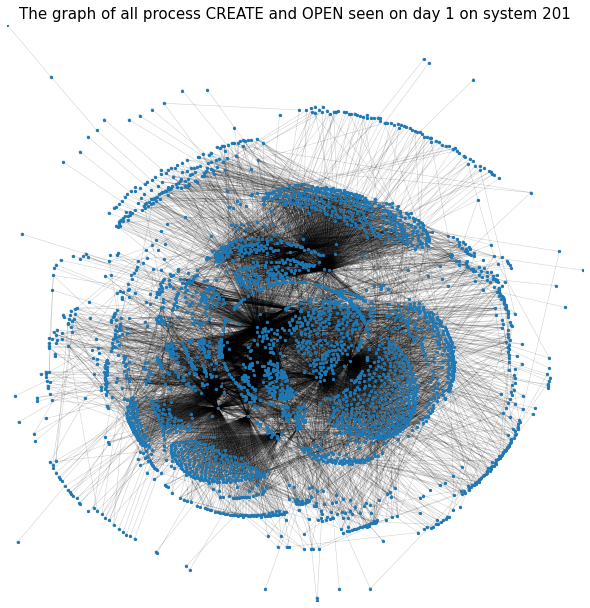

In [15]:
G_loc = nx.Graph()
list_filenames = []
ignore_terminate = True
iterable_loc_ = copy.copy(list_edges_successively_unique[:40000])
edge_pid = {}
node_size = 5
edge_size_attack = 0.5
factor_width = 1
alpha_attack = 0.2
factor_alpha = 1
watched_pid_1 = 5452
color_watched_pid_1 = 'black'
print("watched_pid_1 = "+str(watched_pid_1)+" in "+str(color_watched_pid_1))
watched_pid_2 = 2952
color_watched_pid_2 = 'black'
print("watched_pid_2 = "+str(watched_pid_2)+" in "+str(color_watched_pid_2))
# # to take passed into account
# edges_pid_by_occurrences = {}

plt.figure(figsize=(8,8))
for t_ in tqdm(range(len(iterable_loc_))):
    edge = iterable_loc_[t_]
    edge_pid[str((edge['start'],edge['end']))] = edge['pid']
    # # to take passed into account
#     if str((edge['start'],edge['end'])) not in list(edges_pid_by_occurrences.keys()):
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))] = [edge['pid']]
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))] = [edge['pid']]
#     else:
#         edges_pid_by_occurrences[str((edge['start'],edge['end']))].append(edge['pid'])
#         edges_pid_by_occurrences[str((edge['end'],edge['start']))].append(edge['pid'])
    if ignore_terminate:
        G_loc.add_edge(
            u_of_edge=edge['start'],
            v_of_edge=edge['end']
        )
#         G_loc.add_edge(
#             u_for_edge=edge['start'],
#             v_for_edge=edge['end']
#         )
    else:
        if edge['action'] == 'TERMINATE':
            G_loc.remove_nodes_from([edge['end']])
        else:
            G_loc.add_edge(
                u_of_edge=edge['start'],
                v_of_edge=edge['end'],
                edge_attr_dict_factory={
                    'timestamp':edge['timestamp'],
                    'pid':edge['pid'],
                    'command_line':edge['command_line']
                }
            )

concerned_pid = [edge_pid[str((edge_loc_))] if str((edge_loc_)) in edge_pid.keys() else edge_pid[str((edge_loc_[1],edge_loc_[0]))] for edge_loc_ in G_loc.edges()]
concerned_colors = [color_watched_pid_1 if pid_ == watched_pid_1 else color_watched_pid_2 if pid_ == watched_pid_2 else 'black' for pid_ in concerned_pid]
concerned_width = [edge_size_attack if pid_ in [watched_pid_1,watched_pid_2] else edge_size_attack/factor_width for pid_ in concerned_pid]
concerned_alpha = [alpha_attack if pid_ in [watched_pid_1,watched_pid_2] else alpha_attack/factor_alpha for pid_ in concerned_pid]

# # to take passed into account
# concerned_list_pid = [edges_pid_by_occurrences[str((edge_loc_))] for edge_loc_ in G_loc.edges()]
# concerned_colors_temporal = [color_watched_pid_1 if watched_pid_1 in list_pid else color_watched_pid_2 if watched_pid_2 in list_pid else 'black' for list_pid in concerned_list_pid]
# concerned_width_temporal = [edge_size_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid) else edge_size_attack/factor_width for list_pid in concerned_list_pid]
# concerned_alpha_temporal = [alpha_attack if (watched_pid_1 in list_pid  or watched_pid_2 in list_pid)  else alpha_attack/factor_alpha for list_pid in concerned_list_pid]

nx.draw(
    G=G_loc,
    pos=pos,
    node_size=node_size,
    edge_color=concerned_colors,
    width=concerned_width,
    alpha=concerned_alpha
)

nx.draw(G=G_loc, pos=pos, node_size=node_size, width=0, alpha=1)

plt.xlim(range_['xmin'],range_['xmax'])
plt.ylim(range_['ymin'],range_['ymax'])
# plt.text(x=range_['xmax']-0.35,y=range_['ymax']-0.2,s='up to event = '+str(t_))
# plt.text(x=range_['xmax']-0.75,y=range_['ymax']-0.2,s='up to system time = '+str(edge['timestamp']))

# plt.close()
plt.title('The graph of all process CREATE and OPEN seen on day 1 on system 201',fontsize=15)
# plt.suptitle(f'The {color_watched_pid_1} edges are the one corresponding to pid={watched_pid_1} \n and {color_watched_pid_2} edges are the one corresponding to pid={watched_pid_2}')
plt.savefig(f'plot_all_graph_Terminate_{str(ignore_terminate)}.png')
plt.show()